## Data Collection

Export txt into csv

In [22]:
import csv

data_imported = "dynamic_A2_B1_3"

# Read data from the text file
with open('data/txt/18-05-2024_data_acquisition/'+data_imported+".txt", 'r') as file:
    lines = file.readlines()

# Process data
data = []
for line in lines:
    if line.strip() and not line.startswith('*'):
        parts = line.strip().split()
        tracker = parts[0].strip(':')
        id = parts[1]
        x = parts[2]
        y = parts[3]
        z = parts[4]
        timestamp = parts[5]
        data.append([tracker, id, x, y, z, timestamp])

# Write data to a CSV file
with open('data/csv/'+data_imported+".csv", 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Tracker', 'ID', 'X', 'Y', 'Z', 'Timestamp'])
    csvwriter.writerows(data)

print("Data exported in CSV")


Data exported in CSV


Librairies

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from PIL import Image
import seaborn as sns

Loading data and cleaning 

In [86]:
data = pd.read_csv("data/csv/"+data_imported+".csv")
data_n = data.drop(columns=["Tracker", "ID"])

In [77]:
print(data.describe())
print("")
print(data.info())

                X           Y      Z
count  421.000000  421.000000  421.0
mean     2.851057    1.262093    1.5
std      2.490716    1.481621    0.0
min     -0.765000   -0.764000    1.5
25%      0.354000   -0.244000    1.5
50%      2.681000    1.073000    1.5
75%      5.664000    2.837000    1.5
max      7.737000    3.891000    1.5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tracker    421 non-null    object 
 1   ID         421 non-null    object 
 2   X          421 non-null    float64
 3   Y          421 non-null    float64
 4   Z          421 non-null    float64
 5   Timestamp  421 non-null    object 
dtypes: float64(3), object(3)
memory usage: 19.9+ KB
None


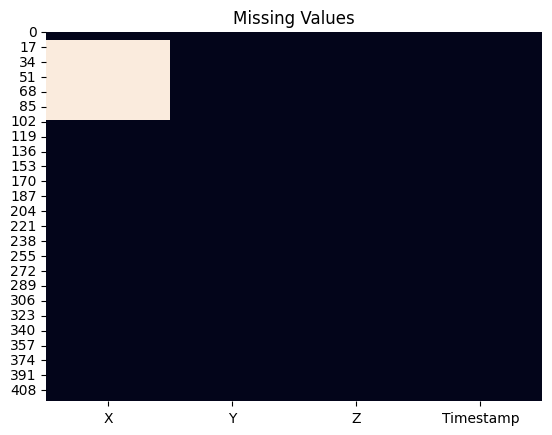

In [33]:
data_n.loc[10:100, "X"] = np.nan
# heatmap of missing data
# Create a heatmap of missing values
sns.heatmap(data_n.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()


Plot the raw Data in animation

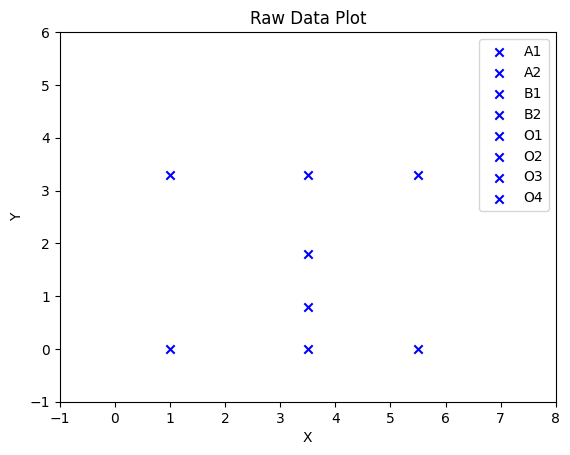

In [5]:
# Initialize the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], 'ro-')

# Set plot limits
ax.set_xlim(min(data_n['X']) - 1, max(data_n['X']) + 1)
ax.set_ylim(min(data_n['Y']) - 1, max(data_n['Y']) + 1)

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    x = data_n['X'][:i]
    y = data_n['Y'][:i]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=data_n.shape[0], interval=200, blit=True)

# Show the real point
A1 = [1, 0]
A2 = [1, 3.3]
B1 = [5.5, 0]
B2 = [5.5, 3.3]
O1 = [3.5, 0]
O2 = [3.5, 0.8]
O3 = [3.5, 1.8]
O4 = [3.5, 3.3]

# make always on the top
plt.scatter(A1[0], A1[1], c='b', label='A1', marker='x')
plt.scatter(A2[0], A2[1], c='b', label='A2', marker='x')
plt.scatter(B1[0], B1[1], c='b', label='B1', marker='x')
plt.scatter(B2[0], B2[1], c='b', label='B2', marker='x')
plt.scatter(O1[0], O1[1], c='b', label='O1', marker='x')
plt.scatter(O2[0], O2[1], c='b', label='O2', marker='x')
plt.scatter(O3[0], O3[1], c='b', label='O3', marker='x')
plt.scatter(O4[0], O4[1], c='b', label='O4', marker='x')


# Show the plot with animation
plt.legend()
plt.xlim(-1, 8)
plt.ylim(-1, 6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw Data Plot')
plt.show()

Add large noise at random

In [68]:
def add_noise(data, noise_level, frequency):
    """
    Adds noise to the data['X'] and data['Y'] columns.
    
    Parameters:
    data (DataFrame): Input data with 'X' and 'Y' columns.
    noise_level (float): The maximum noise level.
    frequency (int): The frequency of noise application.
    
    Returns:
    DataFrame: Data with added noise.
    """
    noisy_data = data.copy()
    num_points = len(data)
    
    noise_indices = np.random.choice(num_points, size=num_points // frequency, replace=False)
    noise_X = np.random.uniform(0, noise_level, size=num_points // frequency)
    noise_Y = np.random.uniform(0, noise_level, size=num_points // frequency)
    
    noisy_data.loc[noise_indices, 'X'] += noise_X
    noisy_data.loc[noise_indices, 'Y'] += noise_Y
    
    return noisy_data
data_n = add_noise(data_n, 5, 10)

## Visualizer of Outliers

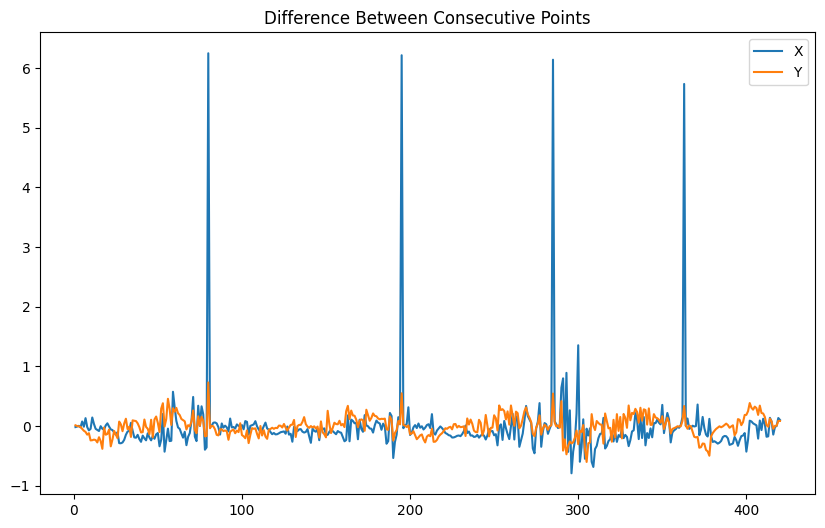

In [92]:
# Structural Analysis

# Calculate the difference between consecutive points

data_diff = data_n.iloc[:, 0:2].diff()
data_diff = data_diff.dropna()

# Plot the difference between consecutive points
plt.figure(figsize=(10, 6))
plt.plot(data_diff['X'], label='X')
plt.plot(data_diff['Y'], label='Y')
plt.title('Difference Between Consecutive Points')
plt.legend()
plt.show()

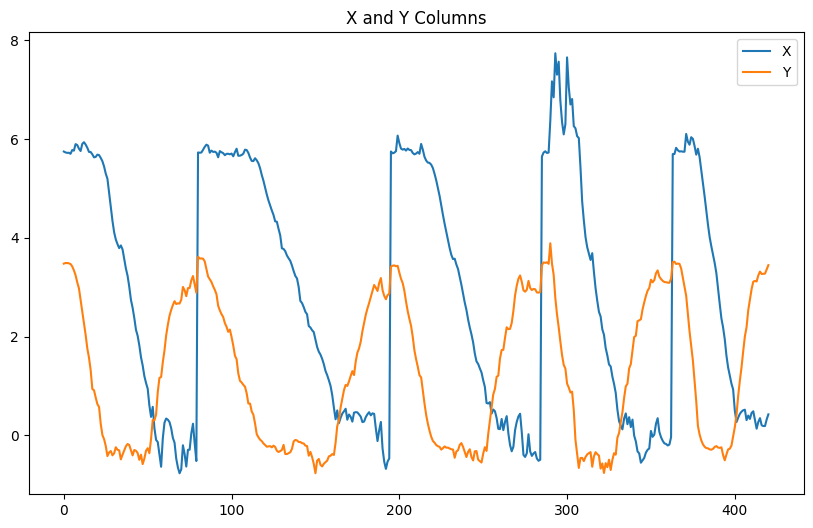

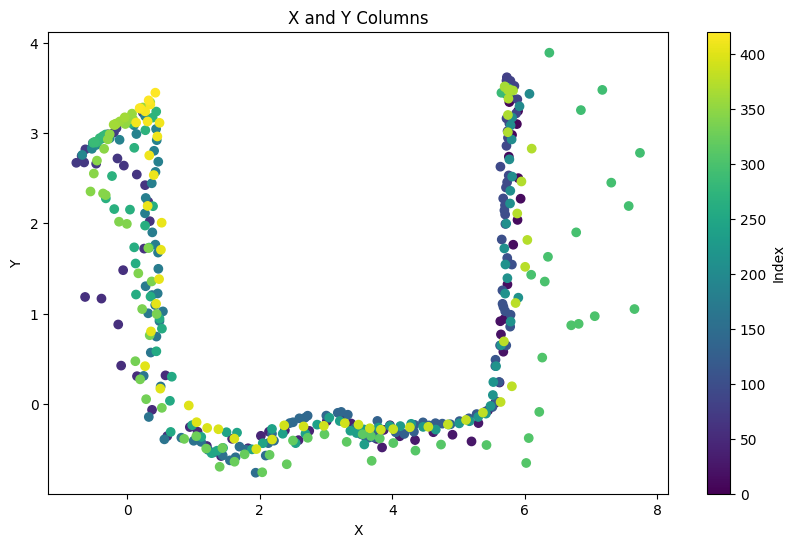

In [97]:
# Column Analysis

# Plot the 'X' and 'Y' columns
plt.figure(figsize=(10, 6))
plt.plot(data_n['X'], label='X')
plt.plot(data_n['Y'], label='Y')
plt.title('X and Y Columns')
plt.legend()
plt.show()

# Plot the 'X' and 'Y' columns with a scatter plot and color by index
plt.figure(figsize=(10, 6))
plt.scatter(data_n['X'], data_n['Y'], c=data_n.index)
plt.title('X and Y Columns')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Index')
plt.show()



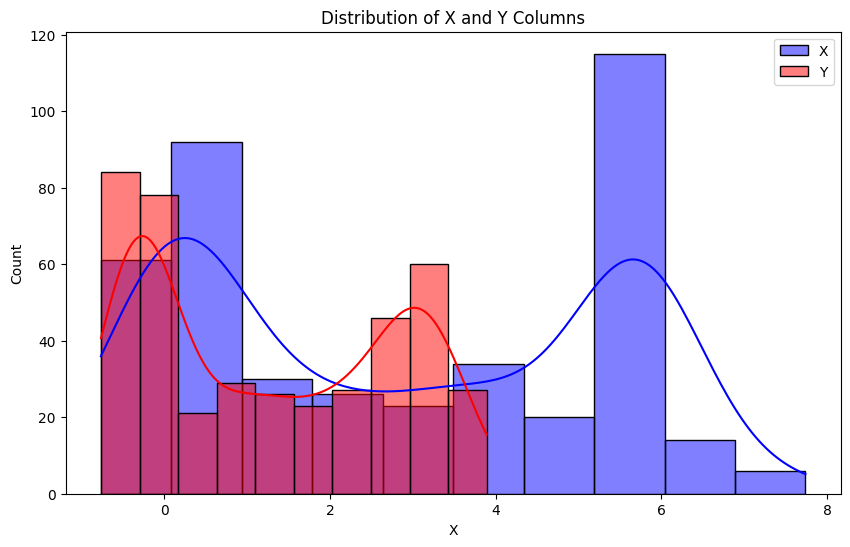

In [105]:
# Distribution Analysis

# Plot the distribution of the 'X' and 'Y' columns

plt.figure(figsize=(10, 6))
sns.histplot(data_n['X'], kde=True, color='blue', label='X')
sns.histplot(data_n['Y'], kde=True, color='red', label='Y')
plt.title('Distribution of X and Y Columns')
plt.legend()
plt.show()

Descriptive Statistics for X Column:
count    421.000000
mean       2.851057
std        2.490716
min       -0.765000
25%        0.354000
50%        2.681000
75%        5.664000
max        7.737000
Name: X, dtype: float64

Descriptive Statistics for Y Column:
count    421.000000
mean       1.262093
std        1.481621
min       -0.764000
25%       -0.244000
50%        1.073000
75%        2.837000
max        3.891000
Name: Y, dtype: float64


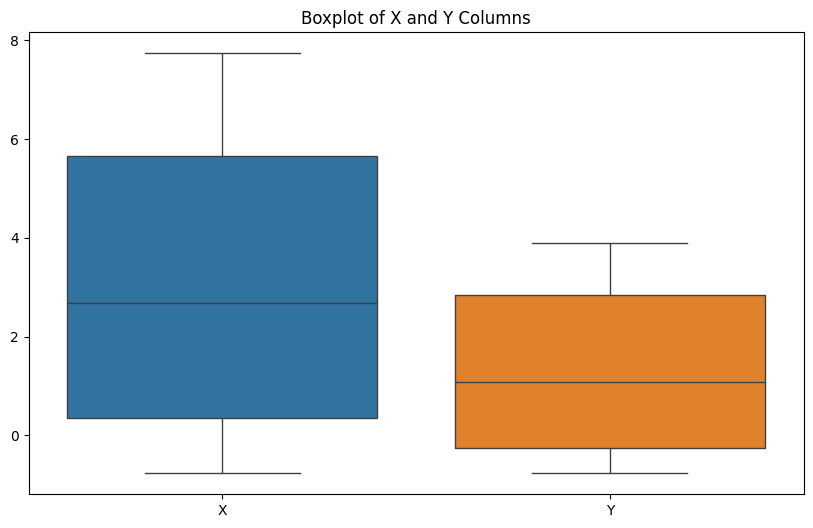

In [111]:
# Descriptive Statistics

# Calculate the descriptive statistics of the 'X' and 'Y' columns
stats_X = data_n['X'].describe()
stats_Y = data_n['Y'].describe()

# Print the descriptive statistics
print('Descriptive Statistics for X Column:')
print(stats_X)
print('\nDescriptive Statistics for Y Column:')
print(stats_Y)

# Plot the boxplot of the 'X' and 'Y' columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_n[['X', 'Y']])
plt.title('Boxplot of X and Y Columns')
plt.show()


